### Import modules 

In [1]:
# numpy stack
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from numpy import array, random, sum, unique
from pandas import DataFrame, read_csv

from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import VanilllaGAN


In [2]:
#!pip install ydata_synthetic

In [3]:
model = VanilllaGAN

### Load and preprocess training data

In [4]:
# load training dataset
data_path = "../../data/"
data = pd.read_csv(data_path + "dataset04.csv", parse_dates = ['DATETIME'], dayfirst=True, index_col=[0])

In [5]:
data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-07-04 00:00:00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,0
2016-07-04 01:00:00,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,0
2016-07-04 02:00:00,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,0
2016-07-04 03:00:00,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,0
2016-07-04 04:00:00,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24 20:00:00,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,...,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98,0
2016-12-24 21:00:00,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,...,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29,0
2016-12-24 22:00:00,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,...,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78,0


In [6]:
#List of columns different from the Class column
num_cols = list(data.columns[ data.columns != 'ATT_FLAG' ])
cat_cols = ['ATT_FLAG']

print('Dataset columns: {}'.format(num_cols))


Dataset columns: ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


In [7]:
sorted_cols = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'S_PU1', 
               'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5', 'S_PU5', 
               'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9', 'S_PU9', 
               'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 
               'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 
               'P_J14', 'P_J422', 'ATT_FLAG']
processed_data = data[ sorted_cols ].copy()

In [8]:
processed_data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-07-04 00:00:00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,0
2016-07-04 01:00:00,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,0
2016-07-04 02:00:00,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,0
2016-07-04 03:00:00,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,0
2016-07-04 04:00:00,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-24 20:00:00,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,...,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98,0
2016-12-24 21:00:00,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,...,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29,0
2016-12-24 22:00:00,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,...,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78,0


In [9]:
# For the purpose of this example we will only synthesize the minority class
# train_data contains 492 rows which had 'Class' value as 1 (which were very few)
#train_data = data.loc[ data['ATT_FLAG']==0 ].copy()
train_data = data.copy()

print("Dataset info: Number of records - {} Number of variables - {}".format(train_data.shape[0], train_data.shape[1]))

# We define a K-means clustering method using sklearn, and declare that
# we want 2 clusters. We then apply this algorithm (fit_predict) to our train_data
# We essentially get an array of 492 rows ('labels') having values either 0 or 1 for the 2 clustered classes.
# algorithm = cluster.KMeans
# args, kwds = (), {'n_clusters':2, 'random_state':0}
# labels = algorithm(*args, **kwds).fit_predict(train_data[ num_cols ])

# # Get the count of both classes
# print( DataFrame( [ [sum(labels==i)] for i in unique(labels) ], columns=['count'], index=unique(labels) ) )

# Assign the k-means clustered classes' labels to the a seperate copy of train data 'fraud_w_classes'
fraud_w_classes = train_data.copy()
# fraud_w_classes['ATT_FLAG'] = labels

Dataset info: Number of records - 4177 Number of variables - 44


In [10]:
train_data.shape[0]

4177

In [11]:
# Define the GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 200+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

#Setting the GAN model parameters and the training step parameters
gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

In [12]:
# Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(data = fraud_w_classes, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

  0%|          | 1/201 [00:01<06:06,  1.83s/it]

0 [D loss: 0.548922, acc.: 74.61%] [G loss: 1.212255]
generated_data


  1%|          | 2/201 [00:02<03:31,  1.06s/it]

1 [D loss: 0.660292, acc.: 66.41%] [G loss: 1.329212]


  1%|▏         | 3/201 [00:02<02:39,  1.24it/s]

2 [D loss: 0.399292, acc.: 82.81%] [G loss: 2.225513]


  2%|▏         | 4/201 [00:03<02:18,  1.42it/s]

3 [D loss: 0.248004, acc.: 92.97%] [G loss: 2.945443]


  2%|▏         | 5/201 [00:03<02:05,  1.56it/s]

4 [D loss: 0.257374, acc.: 91.02%] [G loss: 3.225762]


  3%|▎         | 6/201 [00:04<01:57,  1.65it/s]

5 [D loss: 0.200032, acc.: 91.02%] [G loss: 4.027334]


  3%|▎         | 7/201 [00:05<01:55,  1.67it/s]

6 [D loss: 0.193393, acc.: 93.36%] [G loss: 3.590473]


  4%|▍         | 8/201 [00:05<01:54,  1.69it/s]

7 [D loss: 0.324138, acc.: 87.11%] [G loss: 3.223548]


  4%|▍         | 9/201 [00:06<01:52,  1.71it/s]

8 [D loss: 0.224412, acc.: 89.84%] [G loss: 2.925972]


  5%|▍         | 10/201 [00:06<01:49,  1.75it/s]

9 [D loss: 0.226645, acc.: 92.19%] [G loss: 2.778502]


  5%|▌         | 11/201 [00:07<01:48,  1.75it/s]

10 [D loss: 0.211287, acc.: 91.41%] [G loss: 3.218812]


  6%|▌         | 12/201 [00:07<01:47,  1.76it/s]

11 [D loss: 0.168163, acc.: 94.14%] [G loss: 3.064527]


  6%|▋         | 13/201 [00:08<01:44,  1.79it/s]

12 [D loss: 0.198922, acc.: 92.97%] [G loss: 3.433111]


  7%|▋         | 14/201 [00:08<01:43,  1.81it/s]

13 [D loss: 0.165471, acc.: 94.92%] [G loss: 3.718441]


  7%|▋         | 15/201 [00:09<01:43,  1.80it/s]

14 [D loss: 0.157989, acc.: 93.36%] [G loss: 3.826912]


  8%|▊         | 16/201 [00:10<01:42,  1.81it/s]

15 [D loss: 0.124144, acc.: 94.92%] [G loss: 3.894479]


  8%|▊         | 17/201 [00:10<01:43,  1.79it/s]

16 [D loss: 0.104909, acc.: 96.48%] [G loss: 4.213911]


  9%|▉         | 18/201 [00:11<01:44,  1.75it/s]

17 [D loss: 0.098742, acc.: 96.09%] [G loss: 4.182986]


  9%|▉         | 19/201 [00:11<01:43,  1.77it/s]

18 [D loss: 0.111856, acc.: 95.70%] [G loss: 4.183497]


 10%|▉         | 20/201 [00:12<01:42,  1.77it/s]

19 [D loss: 0.099127, acc.: 96.09%] [G loss: 4.592331]


 10%|█         | 21/201 [00:12<01:41,  1.78it/s]

20 [D loss: 0.081985, acc.: 96.88%] [G loss: 4.545350]


 11%|█         | 22/201 [00:13<01:41,  1.77it/s]

21 [D loss: 0.080140, acc.: 96.88%] [G loss: 4.706605]


 11%|█▏        | 23/201 [00:14<01:40,  1.77it/s]

22 [D loss: 0.070660, acc.: 96.88%] [G loss: 5.239677]


 12%|█▏        | 24/201 [00:14<01:39,  1.77it/s]

23 [D loss: 0.059601, acc.: 98.83%] [G loss: 6.025876]


 12%|█▏        | 25/201 [00:15<01:38,  1.78it/s]

24 [D loss: 0.035899, acc.: 99.61%] [G loss: 5.321925]


 13%|█▎        | 26/201 [00:15<01:38,  1.77it/s]

25 [D loss: 0.046554, acc.: 98.83%] [G loss: 6.258731]


 13%|█▎        | 27/201 [00:16<01:38,  1.76it/s]

26 [D loss: 0.030420, acc.: 99.22%] [G loss: 6.037983]


 14%|█▍        | 28/201 [00:16<01:36,  1.78it/s]

27 [D loss: 0.036735, acc.: 99.22%] [G loss: 6.522759]


 14%|█▍        | 29/201 [00:17<01:37,  1.77it/s]

28 [D loss: 0.061019, acc.: 97.27%] [G loss: 5.178530]


 15%|█▍        | 30/201 [00:17<01:36,  1.77it/s]

29 [D loss: 0.058729, acc.: 98.83%] [G loss: 6.319239]


 15%|█▌        | 31/201 [00:18<01:35,  1.78it/s]

30 [D loss: 0.035449, acc.: 98.83%] [G loss: 6.607820]


 16%|█▌        | 32/201 [00:19<01:33,  1.81it/s]

31 [D loss: 0.028839, acc.: 99.22%] [G loss: 6.119751]


 16%|█▋        | 33/201 [00:19<01:33,  1.79it/s]

32 [D loss: 0.072103, acc.: 98.83%] [G loss: 6.744946]


 17%|█▋        | 34/201 [00:20<01:32,  1.80it/s]

33 [D loss: 0.028369, acc.: 99.22%] [G loss: 7.119074]


 17%|█▋        | 35/201 [00:20<01:33,  1.77it/s]

34 [D loss: 0.058551, acc.: 98.83%] [G loss: 7.246469]


 18%|█▊        | 36/201 [00:21<01:34,  1.75it/s]

35 [D loss: 0.052660, acc.: 97.66%] [G loss: 7.265362]


 18%|█▊        | 37/201 [00:21<01:33,  1.75it/s]

36 [D loss: 0.059775, acc.: 98.05%] [G loss: 6.665542]


 19%|█▉        | 38/201 [00:22<01:35,  1.71it/s]

37 [D loss: 0.050711, acc.: 97.66%] [G loss: 6.437864]


 19%|█▉        | 39/201 [00:23<01:34,  1.72it/s]

38 [D loss: 0.027522, acc.: 99.22%] [G loss: 7.735411]


 20%|█▉        | 40/201 [00:23<01:32,  1.74it/s]

39 [D loss: 0.023620, acc.: 99.61%] [G loss: 6.923609]


 20%|██        | 41/201 [00:24<01:31,  1.74it/s]

40 [D loss: 0.030767, acc.: 99.61%] [G loss: 7.800335]


 21%|██        | 42/201 [00:24<01:30,  1.76it/s]

41 [D loss: 0.027134, acc.: 99.61%] [G loss: 7.748541]


 21%|██▏       | 43/201 [00:25<01:30,  1.75it/s]

42 [D loss: 0.033166, acc.: 98.83%] [G loss: 6.195518]


 22%|██▏       | 44/201 [00:25<01:30,  1.74it/s]

43 [D loss: 0.024344, acc.: 99.61%] [G loss: 7.408739]


 22%|██▏       | 45/201 [00:26<01:30,  1.73it/s]

44 [D loss: 0.040566, acc.: 98.44%] [G loss: 7.848179]


 23%|██▎       | 46/201 [00:27<01:29,  1.73it/s]

45 [D loss: 0.031024, acc.: 98.83%] [G loss: 6.693406]


 23%|██▎       | 47/201 [00:27<01:29,  1.72it/s]

46 [D loss: 0.032726, acc.: 98.83%] [G loss: 6.946452]


 24%|██▍       | 48/201 [00:28<01:26,  1.76it/s]

47 [D loss: 0.024412, acc.: 99.61%] [G loss: 7.208457]


 24%|██▍       | 49/201 [00:28<01:25,  1.77it/s]

48 [D loss: 0.022739, acc.: 99.61%] [G loss: 8.217593]


 25%|██▍       | 50/201 [00:29<01:25,  1.77it/s]

49 [D loss: 0.025597, acc.: 99.61%] [G loss: 7.219866]


 25%|██▌       | 51/201 [00:29<01:23,  1.80it/s]

50 [D loss: 0.030885, acc.: 99.61%] [G loss: 7.459405]


 26%|██▌       | 52/201 [00:30<01:23,  1.78it/s]

51 [D loss: 0.026454, acc.: 99.22%] [G loss: 8.190575]


 26%|██▋       | 53/201 [00:31<01:23,  1.77it/s]

52 [D loss: 0.033074, acc.: 99.22%] [G loss: 8.224248]


 27%|██▋       | 54/201 [00:31<01:22,  1.78it/s]

53 [D loss: 0.034062, acc.: 99.22%] [G loss: 7.215941]


 27%|██▋       | 55/201 [00:32<01:21,  1.78it/s]

54 [D loss: 0.025615, acc.: 98.83%] [G loss: 7.324804]


 28%|██▊       | 56/201 [00:32<01:21,  1.77it/s]

55 [D loss: 0.077830, acc.: 97.66%] [G loss: 7.235219]


 28%|██▊       | 57/201 [00:33<01:22,  1.75it/s]

56 [D loss: 0.026554, acc.: 99.22%] [G loss: 7.579162]


 29%|██▉       | 58/201 [00:33<01:20,  1.77it/s]

57 [D loss: 0.018549, acc.: 99.61%] [G loss: 7.941643]


 29%|██▉       | 59/201 [00:34<01:21,  1.74it/s]

58 [D loss: 0.033242, acc.: 98.05%] [G loss: 8.877529]


 30%|██▉       | 60/201 [00:35<01:19,  1.76it/s]

59 [D loss: 0.036875, acc.: 99.22%] [G loss: 8.190033]


 30%|███       | 61/201 [00:35<01:20,  1.75it/s]

60 [D loss: 0.068173, acc.: 97.66%] [G loss: 6.274595]


 31%|███       | 62/201 [00:36<01:20,  1.73it/s]

61 [D loss: 0.017383, acc.: 99.61%] [G loss: 9.120878]


 31%|███▏      | 63/201 [00:36<01:20,  1.72it/s]

62 [D loss: 0.041773, acc.: 98.83%] [G loss: 6.921091]


 32%|███▏      | 64/201 [00:37<01:19,  1.72it/s]

63 [D loss: 0.025319, acc.: 99.61%] [G loss: 7.929857]


 32%|███▏      | 65/201 [00:37<01:18,  1.73it/s]

64 [D loss: 0.029584, acc.: 98.83%] [G loss: 7.813821]


 33%|███▎      | 66/201 [00:38<01:17,  1.74it/s]

65 [D loss: 0.044457, acc.: 98.44%] [G loss: 8.153419]


 33%|███▎      | 67/201 [00:39<01:15,  1.77it/s]

66 [D loss: 0.016159, acc.: 99.22%] [G loss: 7.293264]


 34%|███▍      | 68/201 [00:39<01:15,  1.75it/s]

67 [D loss: 0.023812, acc.: 99.61%] [G loss: 7.672613]


 34%|███▍      | 69/201 [00:40<01:15,  1.75it/s]

68 [D loss: 0.033901, acc.: 98.83%] [G loss: 8.047168]


 35%|███▍      | 70/201 [00:40<01:16,  1.71it/s]

69 [D loss: 0.029429, acc.: 99.22%] [G loss: 8.274043]


 35%|███▌      | 71/201 [00:41<01:16,  1.70it/s]

70 [D loss: 0.050635, acc.: 98.83%] [G loss: 7.836469]


 36%|███▌      | 72/201 [00:42<01:14,  1.72it/s]

71 [D loss: 0.016260, acc.: 99.61%] [G loss: 7.218400]


 36%|███▋      | 73/201 [00:42<01:14,  1.71it/s]

72 [D loss: 0.039388, acc.: 98.83%] [G loss: 6.709531]


 37%|███▋      | 74/201 [00:43<01:14,  1.71it/s]

73 [D loss: 0.024398, acc.: 99.22%] [G loss: 8.454145]


 37%|███▋      | 75/201 [00:43<01:12,  1.73it/s]

74 [D loss: 0.026670, acc.: 99.22%] [G loss: 7.312821]


 38%|███▊      | 76/201 [00:44<01:12,  1.73it/s]

75 [D loss: 0.040301, acc.: 99.22%] [G loss: 8.662271]


 38%|███▊      | 77/201 [00:44<01:10,  1.76it/s]

76 [D loss: 0.023326, acc.: 99.22%] [G loss: 8.185219]


 39%|███▉      | 78/201 [00:45<01:08,  1.78it/s]

77 [D loss: 0.038184, acc.: 98.83%] [G loss: 8.523315]


 39%|███▉      | 79/201 [00:45<01:08,  1.78it/s]

78 [D loss: 0.027767, acc.: 99.61%] [G loss: 8.682619]


 40%|███▉      | 80/201 [00:46<01:07,  1.79it/s]

79 [D loss: 0.022367, acc.: 99.61%] [G loss: 8.150002]


 40%|████      | 81/201 [00:47<01:06,  1.81it/s]

80 [D loss: 0.017446, acc.: 99.61%] [G loss: 7.516437]


 41%|████      | 82/201 [00:47<01:06,  1.80it/s]

81 [D loss: 0.021877, acc.: 99.22%] [G loss: 8.272075]


 41%|████▏     | 83/201 [00:48<01:05,  1.81it/s]

82 [D loss: 0.028267, acc.: 99.22%] [G loss: 9.069651]


 42%|████▏     | 84/201 [00:48<01:04,  1.82it/s]

83 [D loss: 0.044210, acc.: 98.44%] [G loss: 6.937611]


 42%|████▏     | 85/201 [00:49<01:04,  1.79it/s]

84 [D loss: 0.026714, acc.: 99.22%] [G loss: 7.750610]


 43%|████▎     | 86/201 [00:49<01:04,  1.79it/s]

85 [D loss: 0.028279, acc.: 99.61%] [G loss: 7.842137]


 43%|████▎     | 87/201 [00:50<01:03,  1.79it/s]

86 [D loss: 0.026968, acc.: 99.61%] [G loss: 8.675568]


 44%|████▍     | 88/201 [00:50<01:03,  1.78it/s]

87 [D loss: 0.044039, acc.: 97.66%] [G loss: 7.071276]


 44%|████▍     | 89/201 [00:51<01:04,  1.75it/s]

88 [D loss: 0.038902, acc.: 98.44%] [G loss: 7.582657]


 45%|████▍     | 90/201 [00:52<01:02,  1.77it/s]

89 [D loss: 0.020684, acc.: 99.22%] [G loss: 6.748004]


 45%|████▌     | 91/201 [00:52<01:02,  1.75it/s]

90 [D loss: 0.018677, acc.: 99.61%] [G loss: 7.306228]


 46%|████▌     | 92/201 [00:53<01:02,  1.75it/s]

91 [D loss: 0.027038, acc.: 99.22%] [G loss: 6.927552]


 46%|████▋     | 93/201 [00:53<01:00,  1.77it/s]

92 [D loss: 0.034721, acc.: 99.22%] [G loss: 7.484585]


 47%|████▋     | 94/201 [00:54<01:00,  1.76it/s]

93 [D loss: 0.020922, acc.: 99.61%] [G loss: 7.318922]


 47%|████▋     | 95/201 [00:55<01:00,  1.74it/s]

94 [D loss: 0.038760, acc.: 99.22%] [G loss: 7.051671]


 48%|████▊     | 96/201 [00:55<01:00,  1.73it/s]

95 [D loss: 0.018191, acc.: 99.61%] [G loss: 8.497698]


 48%|████▊     | 97/201 [00:56<01:00,  1.71it/s]

96 [D loss: 0.028498, acc.: 99.61%] [G loss: 7.937545]


 49%|████▉     | 98/201 [00:56<01:00,  1.70it/s]

97 [D loss: 0.042705, acc.: 98.83%] [G loss: 7.167124]


 49%|████▉     | 99/201 [00:57<00:59,  1.70it/s]

98 [D loss: 0.032017, acc.: 99.22%] [G loss: 7.964377]


 50%|████▉     | 100/201 [00:57<00:59,  1.71it/s]

99 [D loss: 0.023988, acc.: 99.22%] [G loss: 12.130422]


 50%|█████     | 101/201 [00:58<00:58,  1.71it/s]

100 [D loss: 0.061894, acc.: 99.22%] [G loss: 8.732600]
generated_data


 51%|█████     | 102/201 [00:59<00:57,  1.73it/s]

101 [D loss: 0.021633, acc.: 99.61%] [G loss: 9.164352]


 51%|█████     | 103/201 [00:59<00:56,  1.72it/s]

102 [D loss: 0.017468, acc.: 99.61%] [G loss: 7.989748]


 52%|█████▏    | 104/201 [01:00<00:55,  1.75it/s]

103 [D loss: 0.017947, acc.: 99.22%] [G loss: 6.317576]


 52%|█████▏    | 105/201 [01:00<00:56,  1.70it/s]

104 [D loss: 0.038797, acc.: 98.44%] [G loss: 7.752937]


 53%|█████▎    | 106/201 [01:01<00:55,  1.70it/s]

105 [D loss: 0.040604, acc.: 98.44%] [G loss: 8.741170]


 53%|█████▎    | 107/201 [01:02<00:54,  1.71it/s]

106 [D loss: 0.025379, acc.: 98.83%] [G loss: 8.629107]


 54%|█████▎    | 108/201 [01:02<00:54,  1.71it/s]

107 [D loss: 0.022905, acc.: 99.61%] [G loss: 7.556885]


 54%|█████▍    | 109/201 [01:03<00:53,  1.72it/s]

108 [D loss: 0.048920, acc.: 98.05%] [G loss: 9.875536]


 55%|█████▍    | 110/201 [01:03<00:52,  1.74it/s]

109 [D loss: 0.032920, acc.: 99.22%] [G loss: 8.868670]


 55%|█████▌    | 111/201 [01:04<00:51,  1.75it/s]

110 [D loss: 0.028150, acc.: 99.61%] [G loss: 8.518642]


 56%|█████▌    | 112/201 [01:04<00:51,  1.74it/s]

111 [D loss: 0.034000, acc.: 98.83%] [G loss: 8.175592]


 56%|█████▌    | 113/201 [01:05<00:51,  1.71it/s]

112 [D loss: 0.031213, acc.: 98.83%] [G loss: 8.699259]


 57%|█████▋    | 114/201 [01:06<00:50,  1.71it/s]

113 [D loss: 0.033662, acc.: 99.22%] [G loss: 8.225765]


 57%|█████▋    | 115/201 [01:06<00:50,  1.70it/s]

114 [D loss: 0.018189, acc.: 99.61%] [G loss: 8.390409]


 58%|█████▊    | 116/201 [01:07<00:50,  1.70it/s]

115 [D loss: 0.040809, acc.: 98.83%] [G loss: 8.538053]


 58%|█████▊    | 117/201 [01:07<00:48,  1.72it/s]

116 [D loss: 0.023807, acc.: 99.22%] [G loss: 10.337000]


 59%|█████▊    | 118/201 [01:08<00:47,  1.73it/s]

117 [D loss: 0.023536, acc.: 99.61%] [G loss: 9.087595]


 59%|█████▉    | 119/201 [01:08<00:47,  1.74it/s]

118 [D loss: 0.018072, acc.: 99.61%] [G loss: 7.421493]


 60%|█████▉    | 120/201 [01:09<00:46,  1.76it/s]

119 [D loss: 0.017894, acc.: 99.61%] [G loss: 7.795072]


 60%|██████    | 121/201 [01:10<00:45,  1.78it/s]

120 [D loss: 0.028836, acc.: 99.61%] [G loss: 8.399545]


 61%|██████    | 122/201 [01:10<00:44,  1.78it/s]

121 [D loss: 0.023809, acc.: 99.61%] [G loss: 8.218145]


 61%|██████    | 123/201 [01:11<00:44,  1.75it/s]

122 [D loss: 0.021106, acc.: 99.61%] [G loss: 8.131266]


 62%|██████▏   | 124/201 [01:11<00:44,  1.75it/s]

123 [D loss: 0.029371, acc.: 99.61%] [G loss: 8.181669]


 62%|██████▏   | 125/201 [01:12<00:43,  1.75it/s]

124 [D loss: 0.020895, acc.: 99.61%] [G loss: 7.240783]


 63%|██████▎   | 126/201 [01:12<00:42,  1.75it/s]

125 [D loss: 0.025300, acc.: 99.61%] [G loss: 7.676020]


 63%|██████▎   | 127/201 [01:13<00:42,  1.75it/s]

126 [D loss: 0.019521, acc.: 99.61%] [G loss: 7.625243]


 64%|██████▎   | 128/201 [01:14<00:41,  1.74it/s]

127 [D loss: 0.030420, acc.: 99.22%] [G loss: 7.089430]


 64%|██████▍   | 129/201 [01:14<00:41,  1.73it/s]

128 [D loss: 0.052648, acc.: 98.83%] [G loss: 9.253028]


 65%|██████▍   | 130/201 [01:15<00:40,  1.75it/s]

129 [D loss: 0.028192, acc.: 99.61%] [G loss: 6.853932]


 65%|██████▌   | 131/201 [01:15<00:40,  1.73it/s]

130 [D loss: 0.017633, acc.: 99.61%] [G loss: 6.959772]


 66%|██████▌   | 132/201 [01:16<00:39,  1.73it/s]

131 [D loss: 0.022286, acc.: 99.22%] [G loss: 6.720471]


 66%|██████▌   | 133/201 [01:16<00:39,  1.74it/s]

132 [D loss: 0.030516, acc.: 99.22%] [G loss: 6.686147]


 67%|██████▋   | 134/201 [01:17<00:39,  1.71it/s]

133 [D loss: 0.027028, acc.: 99.61%] [G loss: 7.628478]


 67%|██████▋   | 135/201 [01:18<00:38,  1.72it/s]

134 [D loss: 0.024678, acc.: 99.61%] [G loss: 8.649902]


 68%|██████▊   | 136/201 [01:18<00:37,  1.72it/s]

135 [D loss: 0.010673, acc.: 99.61%] [G loss: 7.788978]


 68%|██████▊   | 137/201 [01:19<00:36,  1.76it/s]

136 [D loss: 0.017646, acc.: 99.61%] [G loss: 10.002049]


 69%|██████▊   | 138/201 [01:19<00:36,  1.74it/s]

137 [D loss: 0.015858, acc.: 99.61%] [G loss: 8.455295]


 69%|██████▉   | 139/201 [01:20<00:36,  1.71it/s]

138 [D loss: 0.016959, acc.: 99.61%] [G loss: 8.721319]


 70%|██████▉   | 140/201 [01:21<00:35,  1.70it/s]

139 [D loss: 0.012593, acc.: 99.61%] [G loss: 7.584646]


 70%|███████   | 141/201 [01:21<00:34,  1.73it/s]

140 [D loss: 0.018508, acc.: 99.61%] [G loss: 8.254143]


 71%|███████   | 142/201 [01:22<00:34,  1.72it/s]

141 [D loss: 0.011653, acc.: 99.61%] [G loss: 7.816989]


 71%|███████   | 143/201 [01:22<00:34,  1.68it/s]

142 [D loss: 0.016711, acc.: 99.61%] [G loss: 8.540270]


 72%|███████▏  | 144/201 [01:23<00:33,  1.71it/s]

143 [D loss: 0.019440, acc.: 99.61%] [G loss: 9.406668]


 72%|███████▏  | 145/201 [01:23<00:32,  1.74it/s]

144 [D loss: 0.014006, acc.: 99.61%] [G loss: 8.494671]


 73%|███████▎  | 146/201 [01:24<00:31,  1.72it/s]

145 [D loss: 0.024402, acc.: 99.22%] [G loss: 7.517290]


 73%|███████▎  | 147/201 [01:25<00:31,  1.72it/s]

146 [D loss: 0.029799, acc.: 99.61%] [G loss: 10.802294]


 74%|███████▎  | 148/201 [01:25<00:31,  1.70it/s]

147 [D loss: 0.016320, acc.: 99.61%] [G loss: 7.991294]


 74%|███████▍  | 149/201 [01:26<00:30,  1.73it/s]

148 [D loss: 0.021237, acc.: 99.22%] [G loss: 8.796926]


 75%|███████▍  | 150/201 [01:26<00:29,  1.74it/s]

149 [D loss: 0.018917, acc.: 99.61%] [G loss: 7.796970]


 75%|███████▌  | 151/201 [01:27<00:28,  1.73it/s]

150 [D loss: 0.039232, acc.: 99.22%] [G loss: 8.579447]


 76%|███████▌  | 152/201 [01:28<00:28,  1.75it/s]

151 [D loss: 0.019869, acc.: 99.61%] [G loss: 8.206503]


 76%|███████▌  | 153/201 [01:28<00:27,  1.76it/s]

152 [D loss: 0.023104, acc.: 99.61%] [G loss: 9.123744]


 77%|███████▋  | 154/201 [01:29<00:26,  1.77it/s]

153 [D loss: 0.044099, acc.: 98.83%] [G loss: 9.475507]


 77%|███████▋  | 155/201 [01:29<00:25,  1.78it/s]

154 [D loss: 0.026728, acc.: 98.83%] [G loss: 7.962600]


 78%|███████▊  | 156/201 [01:30<00:25,  1.80it/s]

155 [D loss: 0.032156, acc.: 99.22%] [G loss: 7.469554]


 78%|███████▊  | 157/201 [01:30<00:24,  1.79it/s]

156 [D loss: 0.017979, acc.: 99.22%] [G loss: 7.207759]


 79%|███████▊  | 158/201 [01:31<00:24,  1.76it/s]

157 [D loss: 0.024977, acc.: 99.22%] [G loss: 8.472706]


 79%|███████▉  | 159/201 [01:31<00:23,  1.76it/s]

158 [D loss: 0.022085, acc.: 99.61%] [G loss: 8.370284]


 80%|███████▉  | 160/201 [01:32<00:23,  1.74it/s]

159 [D loss: 0.015975, acc.: 99.61%] [G loss: 9.691420]


 80%|████████  | 161/201 [01:33<00:22,  1.75it/s]

160 [D loss: 0.031854, acc.: 98.83%] [G loss: 8.482685]


 81%|████████  | 162/201 [01:33<00:22,  1.75it/s]

161 [D loss: 0.020677, acc.: 99.61%] [G loss: 9.396670]


 81%|████████  | 163/201 [01:34<00:21,  1.78it/s]

162 [D loss: 0.012052, acc.: 99.22%] [G loss: 7.248122]


 82%|████████▏ | 164/201 [01:34<00:20,  1.77it/s]

163 [D loss: 0.036946, acc.: 99.61%] [G loss: 11.131980]


 82%|████████▏ | 165/201 [01:35<00:20,  1.75it/s]

164 [D loss: 0.024814, acc.: 99.61%] [G loss: 8.210730]


 83%|████████▎ | 166/201 [01:35<00:20,  1.74it/s]

165 [D loss: 0.033972, acc.: 98.83%] [G loss: 10.146287]


 83%|████████▎ | 167/201 [01:36<00:19,  1.73it/s]

166 [D loss: 0.014411, acc.: 99.61%] [G loss: 8.961348]


 84%|████████▎ | 168/201 [01:37<00:19,  1.74it/s]

167 [D loss: 0.027930, acc.: 99.61%] [G loss: 9.443415]


 84%|████████▍ | 169/201 [01:37<00:18,  1.74it/s]

168 [D loss: 0.030119, acc.: 98.83%] [G loss: 9.326715]


 85%|████████▍ | 170/201 [01:38<00:17,  1.75it/s]

169 [D loss: 0.026410, acc.: 99.22%] [G loss: 9.990864]


 85%|████████▌ | 171/201 [01:38<00:16,  1.77it/s]

170 [D loss: 0.042406, acc.: 98.83%] [G loss: 11.434890]


 86%|████████▌ | 172/201 [01:39<00:16,  1.73it/s]

171 [D loss: 0.032800, acc.: 99.22%] [G loss: 9.466730]


 86%|████████▌ | 173/201 [01:39<00:16,  1.73it/s]

172 [D loss: 0.019963, acc.: 99.61%] [G loss: 8.027446]


 87%|████████▋ | 174/201 [01:40<00:15,  1.72it/s]

173 [D loss: 0.034285, acc.: 99.22%] [G loss: 10.533092]


 87%|████████▋ | 175/201 [01:41<00:15,  1.73it/s]

174 [D loss: 0.019304, acc.: 99.61%] [G loss: 9.254623]


 88%|████████▊ | 176/201 [01:41<00:14,  1.74it/s]

175 [D loss: 0.022214, acc.: 98.44%] [G loss: 7.950516]


 88%|████████▊ | 177/201 [01:42<00:13,  1.75it/s]

176 [D loss: 0.036134, acc.: 99.61%] [G loss: 9.572607]


 89%|████████▊ | 178/201 [01:42<00:13,  1.76it/s]

177 [D loss: 0.028796, acc.: 99.22%] [G loss: 10.333567]


 89%|████████▉ | 179/201 [01:43<00:12,  1.75it/s]

178 [D loss: 0.014693, acc.: 99.61%] [G loss: 9.300477]


 90%|████████▉ | 180/201 [01:43<00:11,  1.79it/s]

179 [D loss: 0.025614, acc.: 99.22%] [G loss: 8.694577]


 90%|█████████ | 181/201 [01:44<00:11,  1.79it/s]

180 [D loss: 0.018654, acc.: 99.61%] [G loss: 8.752031]


 91%|█████████ | 182/201 [01:45<00:10,  1.82it/s]

181 [D loss: 0.010506, acc.: 99.22%] [G loss: 7.993325]


 91%|█████████ | 183/201 [01:45<00:09,  1.81it/s]

182 [D loss: 0.017483, acc.: 99.61%] [G loss: 9.324038]


 92%|█████████▏| 184/201 [01:46<00:09,  1.79it/s]

183 [D loss: 0.014819, acc.: 99.61%] [G loss: 7.759291]


 92%|█████████▏| 185/201 [01:46<00:08,  1.79it/s]

184 [D loss: 0.018532, acc.: 99.22%] [G loss: 7.798304]


 93%|█████████▎| 186/201 [01:47<00:08,  1.80it/s]

185 [D loss: 0.024027, acc.: 99.61%] [G loss: 11.252266]


 93%|█████████▎| 187/201 [01:47<00:07,  1.81it/s]

186 [D loss: 0.023151, acc.: 99.61%] [G loss: 9.205033]


 94%|█████████▎| 188/201 [01:48<00:07,  1.82it/s]

187 [D loss: 0.037200, acc.: 98.44%] [G loss: 9.035131]


 94%|█████████▍| 189/201 [01:48<00:06,  1.82it/s]

188 [D loss: 0.027224, acc.: 99.22%] [G loss: 9.845059]


 95%|█████████▍| 190/201 [01:49<00:06,  1.80it/s]

189 [D loss: 0.040443, acc.: 99.22%] [G loss: 10.335657]


 95%|█████████▌| 191/201 [01:50<00:05,  1.81it/s]

190 [D loss: 0.020575, acc.: 99.22%] [G loss: 8.256144]


 96%|█████████▌| 192/201 [01:50<00:05,  1.78it/s]

191 [D loss: 0.029997, acc.: 98.83%] [G loss: 8.103080]


 96%|█████████▌| 193/201 [01:51<00:04,  1.77it/s]

192 [D loss: 0.015197, acc.: 99.61%] [G loss: 7.738750]


 97%|█████████▋| 194/201 [01:51<00:03,  1.81it/s]

193 [D loss: 0.059309, acc.: 98.83%] [G loss: 7.718753]


 97%|█████████▋| 195/201 [01:52<00:03,  1.84it/s]

194 [D loss: 0.033217, acc.: 99.22%] [G loss: 8.589064]


 98%|█████████▊| 196/201 [01:52<00:02,  1.83it/s]

195 [D loss: 0.056208, acc.: 97.66%] [G loss: 9.056664]


 98%|█████████▊| 197/201 [01:53<00:02,  1.81it/s]

196 [D loss: 0.023216, acc.: 99.61%] [G loss: 9.443652]


 99%|█████████▊| 198/201 [01:53<00:01,  1.83it/s]

197 [D loss: 0.026714, acc.: 98.83%] [G loss: 8.764989]


 99%|█████████▉| 199/201 [01:54<00:01,  1.82it/s]

198 [D loss: 0.035892, acc.: 99.22%] [G loss: 8.438047]


100%|█████████▉| 200/201 [01:54<00:00,  1.83it/s]

199 [D loss: 0.035673, acc.: 99.22%] [G loss: 11.183241]


100%|██████████| 201/201 [01:55<00:00,  1.74it/s]

200 [D loss: 0.023124, acc.: 98.83%] [G loss: 9.088078]
generated_data


In [13]:
# Generator description
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(128, 32)]               0         
_________________________________________________________________
dense (Dense)                (128, 128)                4224      
_________________________________________________________________
dense_1 (Dense)              (128, 256)                33024     
_________________________________________________________________
dense_2 (Dense)              (128, 512)                131584    
_________________________________________________________________
dense_3 (Dense)              (128, 45)                 23085     
_________________________________________________________________
gumbel_softmax_activation (G (128, 45)                 0         
Total params: 191,917
Trainable params: 191,917
Non-trainable params: 0
_______________________________________________________

In [14]:
# Discriminator description
synthesizer.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 45)]               0         
_________________________________________________________________
dense_4 (Dense)              (128, 512)                23552     
_________________________________________________________________
dropout (Dropout)            (128, 512)                0         
_________________________________________________________________
dense_5 (Dense)              (128, 256)                131328    
_________________________________________________________________
dropout_1 (Dropout)          (128, 256)                0         
_________________________________________________________________
dense_6 (Dense)              (128, 128)                32896     
_________________________________________________________________
dense_7 (Dense)              (128, 1)                  129 

In [15]:
# You can easily save the trained generator and loaded it afterwards
if not os.path.exists("./saved/gan"):
    os.makedirs("./saved/gan")
synthesizer.save(path="./saved/gan/generator_fraud.pkl")

In [16]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

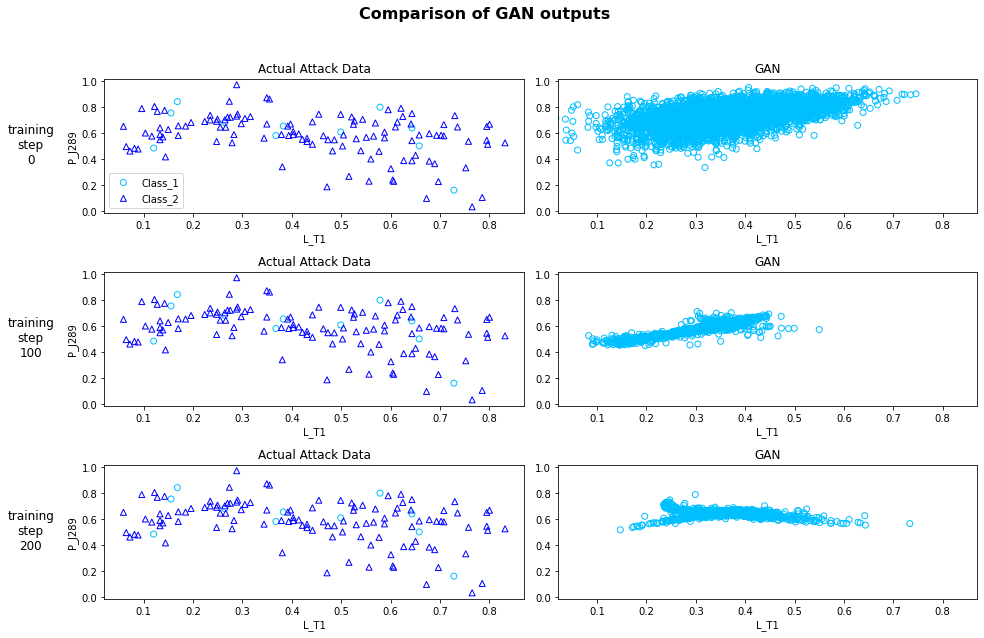

In [17]:
# Setup parameters visualization parameters
seed = 17
test_size = 4177 #3685 #492 # number of fraud cases
noise_dim = 32

random.seed(seed)
z = random.normal(size=(test_size, noise_dim))
real_processed = synthesizer.processor.transform(fraud_w_classes)
real_samples = synthesizer.get_data_batch(real_processed, batch_size)
class_labels = ['Class_1','Class_2']
real_samples = DataFrame(real_samples, columns=num_cols+class_labels)
labels = fraud_w_classes['ATT_FLAG']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'L_T1', 'P_J289'

base_dir = 'cache/'

# Actual fraud data visualization
model_steps = [ 0, 100, 200]
rows = len(model_steps)
columns = 1 + len(models)

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

# Go through each of the 3 model_step values -> 0, 100, 200
for model_step_ix, model_step in enumerate(model_steps):
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    # Plot 'Class 1' and 'Class 2' samples taken from the original data, in a random shuffled fashion
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]],
                         label=label, marker=marker, edgecolors=color, facecolors='none' )

    plt.title('Actual Attack Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()

    if model_step_ix == 0:
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    # Go through all the GAN models listed in 'model_names' and defined in 'models'
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model([z, labels])
            gen_samples = DataFrame(g_z, columns=num_cols+class_labels)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]],
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model(z)
            gen_samples = DataFrame(g_z, columns=num_cols+class_labels)
            gen_samples.to_csv('../../data/Generated_sample_normal.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]],
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)
        plt.xlabel(col1)
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for training steps
vpositions = array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

if not os.path.exists("./img"):
    os.makedirs("./img")
plt.savefig('img/Comparison_of_GAN_outputs.png', dpi=300)